In [1]:
import numpy as np
import pandas as pd

In [2]:
#making list of filenames to load locally

filenames = ["full_numpy_bitmap_alarm clock.npy", "full_numpy_bitmap_bicycle.npy", "full_numpy_bitmap_boomerang.npy", "full_numpy_bitmap_bread.npy", "full_numpy_bitmap_broccoli.npy", "full_numpy_bitmap_lantern.npy", "full_numpy_bitmap_lightning.npy", "full_numpy_bitmap_streetlight.npy", "full_numpy_bitmap_tennis racquet.npy", "full_numpy_bitmap_tractor.npy"]

In [3]:
class_name = os.path.splitext(filenames[0])[0]
class_name

'full_numpy_bitmap_alarm clock'

In [4]:
#creating X, y and index to use for the loop and a label_names for making a list to check the y-label
X = np.empty([0, 784])
y = np.empty([0])
index = 0

#setting a max per class to retrieve from npy file, we taking 5000 subjects per label for training
max_items_per_class = 5000

#loading data from the npy files. taking 5000 per label and creating a (y)target using the index starting from 1.
import os
label_names = []

for fname in filenames:
    label_name = fname
    label_name = os.path.splitext(label_name)[0]
    label_name = label_name.replace("full_numpy_bitmap_", "")
    print(label_name)
    label_names.append(label_name) if label_name not in label_names else label_names
    data = np.load('../raw_data/' + fname)
    data = data[0: max_items_per_class, :]
    label = np.full(data.shape[0], index)
    y = np.append(y, label)
    X = np.concatenate((X, data), axis=0)
    index += 1

alarm clock
bicycle
boomerang
bread
broccoli
lantern
lightning
streetlight
tennis racquet
tractor


In [5]:
#checking shape of the X after looping the filenames
X.shape

(50000, 784)

In [6]:
#reshaping to (28,28)

X = X.reshape(len(X),28,28)
X.shape

(50000, 28, 28)

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
#making test and training set with train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
X_train.shape

(40000, 28, 28)

In [10]:
y_train[23]

2.0

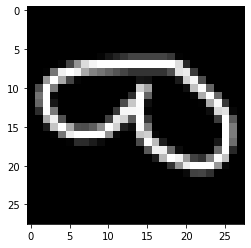

In [11]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
plt.imshow(X_train[23], cmap='gray') 

In [12]:
# Keras needs images whose last dimension is the number of channels, its 1 for black and white.
from tensorflow.keras.backend import expand_dims

X_train = expand_dims(X_train, axis=-1)
X_test = expand_dims(X_test, axis=-1)

print(X_train.shape)
print(X_test.shape)

(40000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
X_train /= 255 
X_test /= 255